<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Shoot_for_Love_Impossible_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 슛포러브 세기의 도전

Shoot for Love: Impossible Mission

[이천수, 35m 밖에서 농구골대 골인시키기에 도전](https://youtu.be/qCxNzvLJZ3E?si=Ktwqk5XokZ3ayTRB)


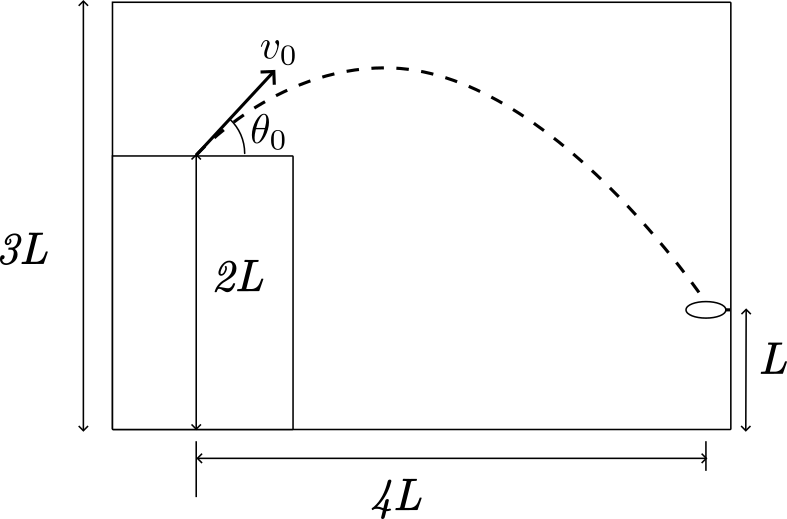

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
g, L, v0, theta0 = smp.symbols(r'g L v_0, \theta_0')

In [3]:
g

g

In [4]:
t = smp.symbols('t')

In [5]:
x=v0*smp.cos(theta0)*t
y=2*L+v0*smp.sin(theta0)*t-(1/2)*g*t**2

In [6]:
x

t*v_0*cos(\theta_0)

In [7]:
y

2*L - 0.5*g*t**2 + t*v_0*sin(\theta_0)

* $\xi=\dfrac{x}{L}$ 이라 하고, $\eta = \dfrac{y}{L}$, $u=\dfrac{v}{\sqrt{gL}}$, $u_0=\dfrac{v_0}{\sqrt{gL}}$ 라 하면,

$$ y = 2L + \tan\theta_0 x - \dfrac{g}{2v_0^2 \cos^2\theta_0} x^2 $$ 에서,

$$ \dfrac{y}{L} = 2 + \tan\theta_0 \dfrac{x}{L} - \dfrac{g L}{2v_0^2 \cos^2\theta_0} \left(\dfrac{x}{L}\right)^2 $$,

$$ \eta = 2 + \tan\theta_0 \xi - \dfrac{1}{2u^2 \cos^2\theta_0} \xi^2$$

In [8]:
xi, u0 = smp.symbols(r'\xi u_0')

In [9]:
eta = 2+smp.tan(theta0)*xi-xi**2/(2*u0**2*smp.cos(theta0)**2)
eta

-\xi**2/(2*u_0**2*cos(\theta_0)**2) + \xi*tan(\theta_0) + 2

In [10]:
# eta로부터 매개변수 u0, theta0에 대하여 xi 에 대한 계산 가능한 함수 etaf를 만든다:
etaf=smp.lambdify([u0, theta0, xi], eta)

* $\xi$가 $4$에, 즉 $x$가 $4L$ 에 도달하는 시각:

In [11]:
t1 = smp.solve(x/L-4,t)[0]
t1

4*L/(v_0*cos(\theta_0))

* 시각 $t_1$일 때 $y$의 값:

In [12]:
y1 = smp.Subs(y, t, t1).doit()
y1

-8.0*L**2*g/(v_0**2*cos(\theta_0)**2) + 4*L*sin(\theta_0)/cos(\theta_0) + 2*L

In [13]:
eta1 = smp.Subs(eta, xi, 4).doit()
eta1

4*tan(\theta_0) + 2 - 8/(u_0**2*cos(\theta_0)**2)

* $\theta_0$가 주어졌을 때, $\eta_1$ 값이 $1$, 즉 $y_1$ 값이 $L$이 되기 위한 초기속도 $u_0$의 값:

In [14]:
usol = smp.solve(eta1-1, u0)[1]
usol

2*sqrt(2)*sqrt(1/(4*tan(\theta_0) + 1))/cos(\theta_0)

* $u_0^2$

In [15]:
usol**2

8/((4*tan(\theta_0) + 1)*cos(\theta_0)**2)

* 궤도의 최고점 높이

In [16]:
H = 2*L + v0**2/(2*g) * smp.sin(theta0)**2
H

2*L + v_0**2*sin(\theta_0)**2/(2*g)

* $h=\dfrac{H}{L} = 2+\dfrac{v_0^2\sin^2\theta_0}{2gL} = 2+\dfrac{u_0^2 \sin^2\theta_0}{2}$ 에 usol 의 결과를 대입하여, $\theta_0$ 에 대한 최대 높이의 식을 얻는다:

In [21]:
h = smp.Subs(2+u0**2*smp.sin(theta0)**2/2, u0, usol).doit()
h

2 + 4*sin(\theta_0)**2/((4*tan(\theta_0) + 1)*cos(\theta_0)**2)

* $h=3$, 즉 $H=3L$이 되는 $\theta_0$의 값을 구하면:

In [22]:
thm=smp.nsolve(h-3, theta0, 1)
thm

0.878960513151672

In [23]:
th1 = float(thm)
th1

0.8789605131516716

In [24]:
th0 = float(smp.solve(4*smp.tan(theta0)+1, theta0,0)[0][0])
th0

-0.24497866312686414

In [25]:
# h = H/L 을 함수로 만든다
hf = smp.lambdify([theta0], h)

In [26]:
hf(th1)

np.float64(3.0)

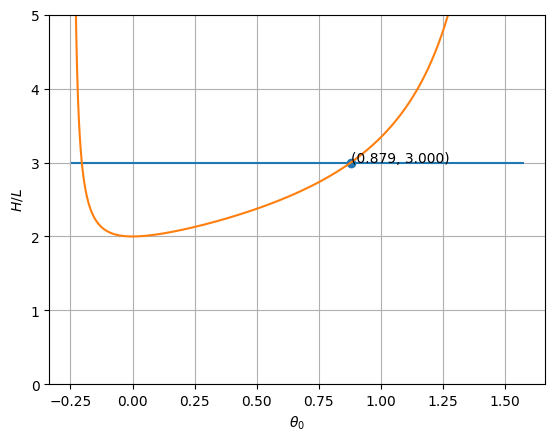

In [34]:
th = np.linspace(th0, np.pi/2, 501)
hs = hf(th)
hlim = np.ones(len(th)) * 3
plt.grid()
plt.xlabel(r'$\theta _0$')
plt.ylabel('$H/L$')
plt.ylim(0,5)
plt.plot(th, hlim)
plt.plot(th[:-1], hs[:-1])
plt.scatter([th1], [hf(th1)])
plt.text(th1, hf(th1), f'({th1:.3f}, {hf(th1):.3f})')
plt.show()

usol을 theta_0에 대하여 계산 가능한 함수 uf를 생성한다:

In [ ]:
uf = smp.lambdify([theta0], usol)

또한, $h<3$이라는 조건으로부터,
$$ \begin{array}{rl}
3 > 2 + \dfrac{u_0^2 \sin^2 \theta_0}{2}\\
u_0^2 < \dfrac{2}{\sin^2\theta_0}\\
 u_0 < \dfrac{\sqrt{2}}{\sin\theta_0}
\end{array}$$
이어야 하므로,
$$ u_m(\theta_0) = \dfrac{\sqrt{2}}{\sin\theta_0}$$ 를 정의한다.

In [ ]:
um = smp.sqrt(2)/smp.sin(theta0)
umf = smp.lambdify([theta0], um)
um

sqrt(2)/sin(\theta_0)

In [ ]:
ths = np.linspace(th0, np.pi/2, 100)
us = uf(ths)
ums = umf(ths)

<lambdifygenerated-12>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return 2*sqrt(2)*sqrt((4*tan(Dummy_785) + 1)**(-1.0))/cos(Dummy_785)


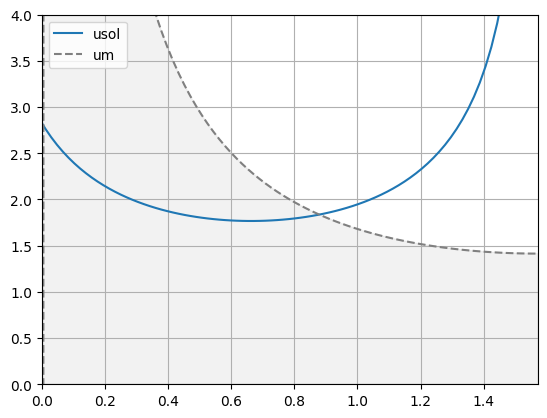

In [ ]:
plt.xlim(0,np.pi/2)
plt.ylim(0,4)

plt.grid()

plt.fill(np.append(ths, np.flip(ths)), np.append(ums, np.zeros(len(ths))), c='gray', alpha=0.1)
plt.plot(ths, us, label='usol')
plt.plot(ths, ums, c='gray', ls='--', label='um')
plt.legend()

In [ ]:
from scipy.optimize import fsolve

In [ ]:
thx = fsolve((lambda x: umf(x)-uf(x)), [0.8, 1.0])[0]
thx

0.8789605131516719

<lambdifygenerated-11>:2: RuntimeWarning: divide by zero encountered in scalar power
  return 2*sqrt(2)*sqrt((4*tan(Dummy_784) + 1)**(-1.0))/cos(Dummy_784)


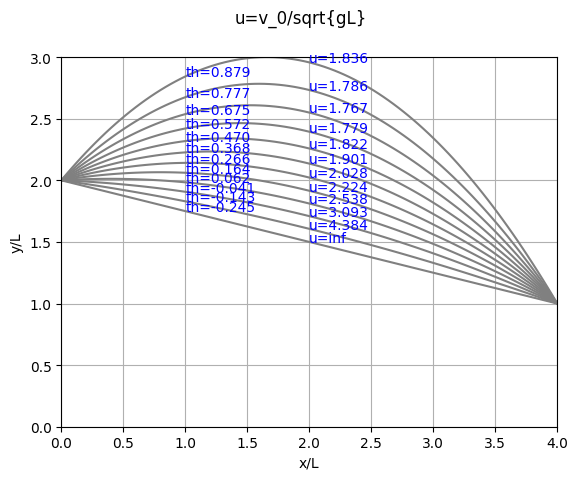

In [ ]:
plt.xlim(0,4)
plt.ylim(0,3)
plt.xlabel("x/L")
plt.ylabel("y/L")
plt.grid()
plt.suptitle(r'u=v_0/sqrt{gL}')
xis = np.linspace(0,4,101)
for th in np.linspace(th0, th1, 12):
  etas = etaf(uf(th), th, xis)
  plt.plot(xis, etas, c='gray')
  plt.text(1.0, etas[25], f'th={th:.3f}', c='b')
  plt.text(2.0, etas[50], f'u={uf(th):.3f}', c='b')

* $v_0$를 최소로 만드는 $\theta_0$의 값:

In [ ]:
thn = smp.nsolve(smp.diff(usol, theta0), theta0,1)
thn

0.662908831834016

In [ ]:
thn2 = float(thn)
thn2

0.6629088318340163

* 대략적인 수치 해:

In [ ]:
dth = np.diff(ths)[0]
uds = np.diff(us)/dth
idx = uds[0:-1]*uds[1:] < 0
th2 = ths[1:-1][idx][0]
th2

0.6686812863947755

* 이 때 $u_0$의 값:

In [ ]:
uf(th2), uf(thn2)

(1.7672784551851908, 1.7672310617510265)

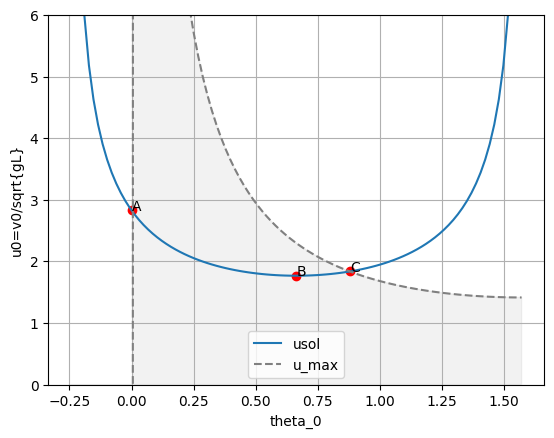

In [ ]:
plt.grid()
plt.ylim(0,6)

plt.fill(np.append(ths, np.flip(ths)), np.append(ums, np.zeros(len(ths))), c='gray', alpha=0.1)
plt.plot(ths, us, label="usol")
plt.plot(ths, ums, c='gray', ls='--', label="u_max")
plt.xlabel('theta_0')
plt.ylabel('u0=v0/sqrt{gL}')
plt.scatter([0, thn2, thx],[uf(0), uf(thn2), uf(thx)], c='r')
plt.text(0,uf(0),'A')
plt.text(thn2,uf(thn2),'B')
plt.text(thx,uf(thx),'C')
plt.legend()

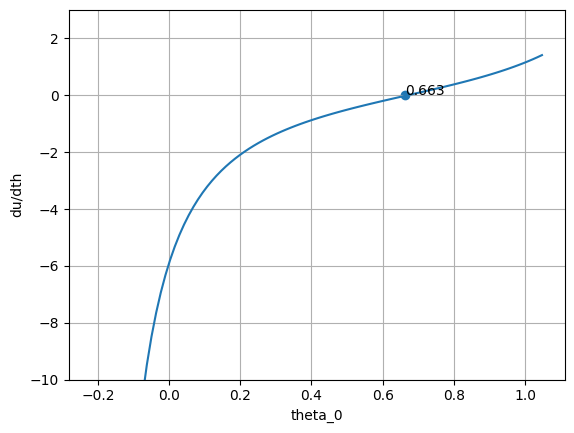

In [ ]:
plt.grid()
plt.ylim(-10,3)
plt.plot(ths[1:], uds)
plt.xlabel('theta_0')
plt.ylabel('du/dth')
plt.scatter([thn2],[0])
plt.text(thn2,0,f'{thn2:.3f}')
plt.show()

* $v_0 = 1.767\sqrt{gL}$ 일 때 $\theta_0$ 값은 $0.663\ \rm rad$ 근처에서 약간의 오차를 허용할 것으로 보인다.

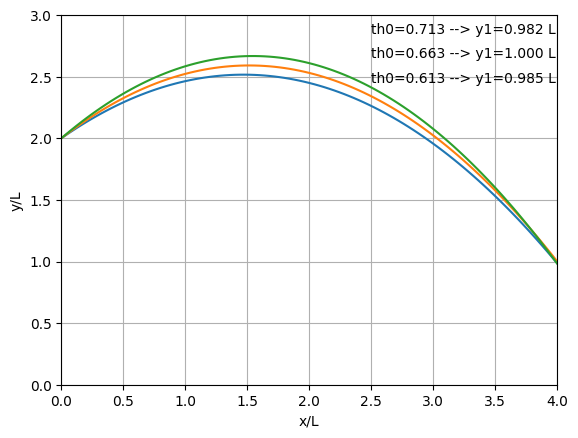

In [ ]:
plt.xlim(0,4)
plt.ylim(0,3)
plt.xlabel("x/L")
plt.ylabel("y/L")
plt.grid()
xis = np.linspace(0,4,101)
for th in np.linspace(thn2-0.05, thn2+0.05, 3):
  etas = etaf(uf(thn2), th, xis)
  plt.plot(xis, etas)
  plt.text(2.5, 4*th, f'th0={th:.3f} --> y1={etas[-1]:.3f} L' )

* $v_0$가 주어졌을 때 $y_1$ 값이 $L$이 되기 위한 초기 각도 $\theta_0$의 값:

In [ ]:
th_sol=smp.solve(1-eta1, theta0)

In [ ]:
th_sol[0].simplify()

I*(-log(-(4 - I)*(I*(u - 4)*(u + 4) - 4*sqrt(u**4 + 2*u**2 - 16))/u**2) + log(17))/2

In [ ]:
th_sol[1].simplify()

I*(-log(-(4 - I)*(I*(u - 4)*(u + 4) + 4*sqrt(u**4 + 2*u**2 - 16))/u**2) + log(17))/2

In [ ]:
th_sol[2].simplify()

I*(-log(-sqrt(-(4 - I)*(I*(u - 4)*(u + 4) - 4*sqrt(u**4 + 2*u**2 - 16))/u**2)) + log(17)/2)

In [ ]:
th_sol[3].simplify()

I*(-log(-sqrt(-(4 - I)*(I*(u - 4)*(u + 4) + 4*sqrt(u**4 + 2*u**2 - 16))/u**2)) + log(17)/2)